In [1]:
import os
import json
import pathlib

In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [4]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score

In [5]:
PROJECT_DIR = pathlib.Path('~/work').expanduser()
DATA_DIR = PROJECT_DIR / 'data'

In [6]:
# https://rstudio-pubs-static.s3.amazonaws.com/120883_c8123ff272164b2a94be097a6237150b.html
YELP_DATA_DIR = DATA_DIR / 'yelp' / 'v6' / 'yelp_dataset_challenge_academic_dataset'

In [7]:
# https://archive.ics.uci.edu/ml/datasets/Online+News+Popularity
ONPD_DATA_DIR = DATA_DIR / 'OnlineNewsPopularity'

# Figure 2-6

The log function compresses the high numeric range and expands the low
range

In [8]:
import numpy as np

In [9]:
y = np.arange(0.00001, 3, 0.01)
x = np.power(10, y)

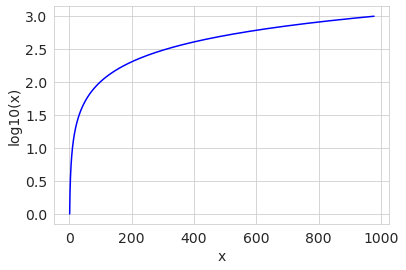

In [10]:
fig, ax = plt.subplots()
plt.plot(x, y, 'b')
ax.tick_params(labelsize=14)
ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('log10(x)', fontsize=14)
plt.show()

# Log Transform on Yelp Reviews Dataset

In [11]:
## Load the data
with open(YELP_DATA_DIR / 'yelp_academic_dataset_business.json') as biz_f:
    biz_df = pd.DataFrame([json.loads(x) for x in biz_f.readlines()])

In [12]:
# Using the previously loaded Yelp reviews DataFrame,
# compute the log transform of the Yelp review count.
# Note that we add 1 to the raw count to prevent the logarithm from
# exploding into negative infinity in case the count is zero.
biz_df['log_review_count'] = np.log10(biz_df['review_count'] + 1)

## Example 2-6

Visualizing the distribution of review counts before and after log transform

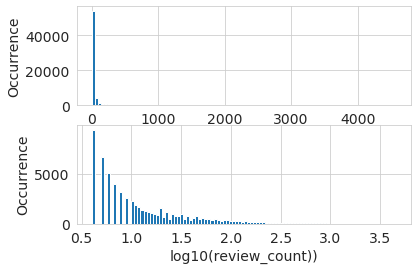

In [13]:
## Visualize the distribution of review counts before and after log transform
fig, (ax1, ax2) = plt.subplots(2, 1)
biz_df['review_count'].hist(ax=ax1, bins=100)
ax1.tick_params(labelsize=14)
ax1.set_xlabel('review_count', fontsize=14)
ax1.set_ylabel('Occurrence', fontsize=14)

biz_df['log_review_count'].hist(ax=ax2, bins=100)
ax2.tick_params(labelsize=14)
ax2.set_xlabel('log10(review_count))', fontsize=14)
ax2.set_ylabel('Occurrence', fontsize=14)
plt.show()

## Example 2-8

Using log transformed Yelp review counts to predict average business rating

In [14]:
# Train linear regression models to predict the average star rating of a business,
# using the review_count feature with and without log transformation.
# Compare the 10-fold cross validation score of the two models.
m_orig = linear_model.LinearRegression()
scores_orig = cross_val_score(m_orig, biz_df[['review_count']], biz_df['stars'], cv=10)
m_log = linear_model.LinearRegression()
scores_log = cross_val_score(m_log, biz_df[['log_review_count']], biz_df['stars'], cv=10)
print("R-squared score without log transform: %0.5f (+/- %0.5f)" 
      % (scores_orig.mean(), scores_orig.std() * 2))
print("R-squared score with log transform: %0.5f (+/- %0.5f)" 
      % (scores_log.mean(), scores_log.std() * 2))

R-squared score without log transform: -0.03683 (+/- 0.07280)
R-squared score with log transform: -0.03694 (+/- 0.07650)


# Log Transform on Online News Popularity Dataset

## Example 2-9

Using log transformed word counts in the Online News Popularity
dataset to predict article popularity

In [15]:
# Download the Online News Popularity dataset from UCI, then use
# Pandas to load the file into a DataFrame.
df = pd.read_csv(
    filepath_or_buffer=ONPD_DATA_DIR / 'OnlineNewsPopularity.csv', 
    delimiter=', ',
    engine='python'
)

In [16]:
# Take the log transform of the 'n_tokens_content' feature, which
# represents the number of words (tokens) in a news article.
df['log_n_tokens_content'] = np.log10(df['n_tokens_content'] + 1)

In [17]:
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,log_n_tokens_content
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,2.342423
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,2.408240
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,2.326336
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,2.725912
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,3.030600


In [18]:
# Train two linear regression models to predict the number of shares
# of an article, one using the original feature and the other the
# log transformed version.
news_orig_model = linear_model.LinearRegression()
scores_orig = cross_val_score(news_orig_model, df[['n_tokens_content']], df['shares'], cv=10)

news_log_model = linear_model.LinearRegression()
scores_log = cross_val_score(news_log_model, df[['log_n_tokens_content']], df['shares'], cv=10)

print("R-squared score without log transform: %0.5f (+/- %0.5f)" 
      % (scores_orig.mean(), scores_orig.std() * 2))

print("R-squared score with log transform: %0.5f (+/- %0.5f)" 
      % (scores_log.mean(), scores_log.std() * 2))

R-squared score without log transform: -0.00242 (+/- 0.00509)
R-squared score with log transform: -0.00114 (+/- 0.00418)


## Example 2-7

Visualizing the distribution of news article popularity with and without log transformation

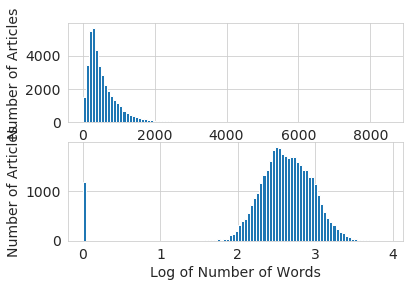

In [19]:
fig, (ax1, ax2) = plt.subplots(2, 1)
df['n_tokens_content'].hist(ax=ax1, bins=100)
ax1.tick_params(labelsize=14)
ax1.set_xlabel('Number of Words in Article', fontsize=14)
ax1.set_ylabel('Number of Articles', fontsize=14)

df['log_n_tokens_content'].hist(ax=ax2, bins=100)
ax2.tick_params(labelsize=14)
ax2.set_xlabel('Log of Number of Words', fontsize=14)
ax2.set_ylabel('Number of Articles', fontsize=14)
plt.show()

## Example 2-10

Visualizing the correlation between input and output in the news
popularity prediction problem

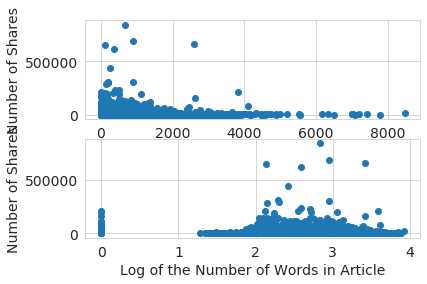

In [20]:
fig2, (ax1, ax2) = plt.subplots(2, 1)
ax1.scatter(df['n_tokens_content'], df['shares'])
ax1.tick_params(labelsize=14)
ax1.set_xlabel('Number of Words in Article', fontsize=14)
ax1.set_ylabel('Number of Shares', fontsize=14)

ax2.scatter(df['log_n_tokens_content'], df['shares'])
ax2.tick_params(labelsize=14)
ax2.set_xlabel('Log of the Number of Words in Article', fontsize=14)
ax2.set_ylabel('Number of Shares', fontsize=14)
plt.show()

## Example 2-11

Visualizing the correlation between input and output in Yelp business
review prediction

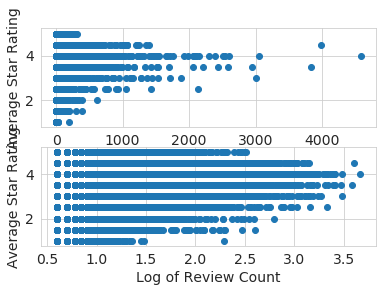

In [21]:
fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.scatter(biz_df['review_count'], biz_df['stars'])
ax1.tick_params(labelsize=14)
ax1.set_xlabel('Review Count', fontsize=14)
ax1.set_ylabel('Average Star Rating', fontsize=14)

ax2.scatter(biz_df['log_review_count'], biz_df['stars'])
ax2.tick_params(labelsize=14)
ax2.set_xlabel('Log of Review Count', fontsize=14)
ax2.set_ylabel('Average Star Rating', fontsize=14)
plt.show()